In [1]:
import pandas as pd
import pathlib
from collections import defaultdict
import re

In [2]:
tsv_dir = pathlib.Path('housing_characteristics').resolve()

# Weather filenames to zipcode

In [3]:
zipcode_wx = pd.read_csv(
    '/Users/nmerket/projects/hescore/OpenStudio-HEScore/resources/zipcodes_wx.csv',
    dtype={'postal_code': 'str'},
    usecols=['postal_code', 'nearest_weather_station', 'weather_filename', 'distance_to_weather_station']
)
zipcode_wx

,postal_code,nearest_weather_station,distance_to_weather_station,weather_filename
0,01001,744915,12.985829,USA_MA_Westfield-Barnes.Muni.AP.744915_TMY3.epw
1,01008,744915,20.037976,USA_MA_Westfield-Barnes.Muni.AP.744915_TMY3.epw
2,01011,744915,26.976707,USA_MA_Westfield-Barnes.Muni.AP.744915_TMY3.epw
3,01012,744915,27.876558,USA_MA_Westfield-Barnes.Muni.AP.744915_TMY3.epw
4,01027,744915,15.418265,USA_MA_Westfield-Barnes.Muni.AP.744915_TMY3.epw
...,...,...,...,...
41527,96942,704140,5421.230305,USA_AK_Shemya.AFB.704140_TMY3.epw
41528,96943,704140,5792.697927,USA_AK_Shemya.AFB.704140_TMY3.epw
41529,96950,704140,4859.936624,USA_AK_Shemya.AFB.704140_TMY3.epw
41530,96951,704140,4984.862348,USA_AK_Shemya.AFB.704140_TMY3.epw


# County to Zipcode

From options lookup

In [4]:
county_to_zipcode = {}
with open('../resources/options_lookup.tsv', 'r') as f:
    for line in f:
        if line.startswith('County\t'):
            county, zipcode = re.search(r'County\s"(.+)"\s.*site_zip_code=(\d+)', line).groups()
            county_to_zipcode[county] = zipcode

In [5]:
set(zipcode_wx['weather_filename']).difference(
    zipcode_wx.loc[zipcode_wx['postal_code'].isin(county_to_zipcode.values()), 'weather_filename']
)

{'USA_AK_Adak.NAS.704540_TMY3.epw',
 'USA_AK_Ambler.701718_TMY3.epw',
 'USA_AK_Anaktuvuk.Pass.701625_TMY3.epw',
 'USA_AK_Anchorage-Elmendorf.AFB.702720_TMY3.epw',
 'USA_AK_Anchorage-Lake.Hood.Seaplane.Base.702725_TMY3.epw',
 'USA_AK_Anchorage.Intl.AP.702730_TMY3.epw',
 'USA_AK_Aniak.AP.702320_TMY3.epw',
 'USA_AK_Anvik.702075_TMY3.epw',
 'USA_AK_Bettles.Field.701740_TMY3.epw',
 'USA_AK_Birchwood.702746_TMY3.epw',
 'USA_AK_Cold.Bay.AP.703160_TMY3.epw',
 'USA_AK_Cordova.702960_TMY3.epw',
 'USA_AK_Deadhorse.700637_TMY3.epw',
 'USA_AK_Dillingham.AWOS.703210_TMY3.epw',
 'USA_AK_Eielson.AFB.702650_TMY3.epw',
 'USA_AK_Emmonak.702084_TMY3.epw',
 'USA_AK_Gambell.702040_TMY3.epw',
 'USA_AK_Gulkana.702710_TMY3.epw',
 'USA_AK_Gustavus.703670_TMY3.epw',
 'USA_AK_Hayes.River.702495_TMY3.epw',
 'USA_AK_Homer.AP.703410_TMY3.epw',
 'USA_AK_Huslia.702225_TMY3.epw',
 'USA_AK_Hydaburg.Seaplane.Base.703884_TMY3.epw',
 'USA_AK_Kake.Seaplane.Base.703855_TMY3.epw',
 'USA_AK_McGrath.AP.702310_TMY3.epw',
 'USA_A

# County

In [6]:
cty_filename = tsv_dir / 'County.tsv'

In [7]:
cty = pd.read_csv(cty_filename, sep='\t', comment='#')

In [8]:
cty

,Dependency=County and PUMA,"Option=AK, Aleutians East Borough","Option=AK, Aleutians West Census Area","Option=AK, Anchorage Municipality","Option=AK, Bethel Census Area","Option=AK, Bristol Bay Borough","Option=AK, Denali Borough","Option=AK, Dillingham Census Area","Option=AK, Fairbanks North Star Borough","Option=AK, Haines Borough",...,"Option=WY, Sheridan County","Option=WY, Sublette County","Option=WY, Sweetwater County","Option=WY, Teton County","Option=WY, Uinta County","Option=WY, Washakie County","Option=WY, Weston County",source_count,source_weight,sampling_probability
0,"G0100010, G01002100",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1887,22714.0,0.000169
1,"G0100030, G01002600",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8628,107579.0,0.000802
2,"G0100050, G01002400",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1820,11802.0,0.000088
3,"G0100070, G01001700",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1777,8972.0,0.000067
4,"G0100090, G01000800",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2750,23850.0,0.000178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4540,"G5600370, G56000500",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,5305,19102.0,0.000142
4541,"G5600390, G56000100",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2501,13292.0,0.000099
4542,"G5600410, G56000500",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2652,8768.0,0.000065
4543,"G5600430, G56000200",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1902,3811.0,0.000028


In [9]:
cty_option_cols = list(filter(lambda x: x.startswith("Option="), cty.columns))
cty_deps_cols = list(filter(lambda x: x.startswith("Dependency="), cty.columns))
cty_extra_cols = sorted(set(cty.columns.values).difference(cty_option_cols).difference(cty_deps_cols), key=list(cty.columns.values).index)


In [10]:
s = cty.set_index(cty_deps_cols)[cty_option_cols].rename(columns=lambda x: x.replace('Option=', '')).unstack()
ctypuma_to_cty = dict(reversed(x) for x in s[s>0].index.values)
ctypuma_to_cty

{'G0200130, G02000400': 'AK, Aleutians East Borough',
 'G0200160, G02000400': 'AK, Aleutians West Census Area',
 'G0200200, G02000101': 'AK, Anchorage Municipality',
 'G0200200, G02000102': 'AK, Anchorage Municipality',
 'G0200500, G02000400': 'AK, Bethel Census Area',
 'G0200600, G02000400': 'AK, Bristol Bay Borough',
 'G0200680, G02000300': 'AK, Denali Borough',
 'G0200700, G02000400': 'AK, Dillingham Census Area',
 'G0200900, G02000300': 'AK, Fairbanks North Star Borough',
 'G0201000, G02000300': 'AK, Haines Borough',
 'G0201050, G02000400': 'AK, Hoonah-Angoon Census Area',
 'G0201100, G02000300': 'AK, Juneau City and Borough',
 'G0201220, G02000200': 'AK, Kenai Peninsula Borough',
 'G0201300, G02000300': 'AK, Ketchikan Gateway Borough',
 'G0201500, G02000400': 'AK, Kodiak Island Borough',
 'G0201580, G02000400': 'AK, Kusilvak Census Area',
 'G0201640, G02000400': 'AK, Lake and Peninsula Borough',
 'G0201700, G02000200': 'AK, Matanuska-Susitna Borough',
 'G0201800, G02000400': 'AK, 

In [11]:
cty_to_ctypuma = defaultdict(list)
for k, v in ctypuma_to_cty.items():
    cty_to_ctypuma[v].append(k)

# County and PUMA

In [12]:
county_and_puma_filename = tsv_dir / "County and PUMA.tsv"

In [13]:
cty_puma = pd.read_csv(county_and_puma_filename, sep='\t', comment='#')

In [14]:
cty_puma_option_cols = list(filter(lambda x: x.startswith("Option="), cty_puma.columns))
cty_puma_deps_cols = list(filter(lambda x: x.startswith("Dependency="), cty_puma.columns))
cty_puma_extra_cols = sorted(set(cty_puma.columns.values).difference(cty_puma_option_cols).difference(cty_puma_deps_cols), key=list(cty_puma.columns.values).index)
cty_puma_extra_cols

['source_count', 'source_weight', 'sampling_probability']

In [15]:
df = cty_puma.set_index(cty_puma_deps_cols)[cty_puma_option_cols].rename(columns=lambda x: x.replace('Option=', ''))
df

,"G0100010, G01002100","G0100030, G01002600","G0100050, G01002400","G0100070, G01001700","G0100090, G01000800","G0100110, G01002400","G0100130, G01002300","G0100150, G01001100","G0100170, G01001800","G0100190, G01001000",...,"G5600270, G56000200","G5600290, G56000100","G5600310, G56000200","G5600330, G56000100","G5600350, G56000500","G5600370, G56000500","G5600390, G56000100","G5600410, G56000500","G5600430, G56000200","G5600450, G56000200"
Dependency=ASHRAE IECC Climate Zone 2004,,,,,,,,,,,,,,,,,,,,,
1A,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2A,0.000000,0.006922,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2B,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3A,0.001273,0.000000,0.000662,0.000503,0.001337,0.00025,0.000556,0.00299,0.000948,0.000912,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3B,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3C,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4A,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4B,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4C,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [16]:
new_rows = []
for cz, row in df.iterrows():
    print(cz)
    cps = row[row>0].index.values
    ctys = set(map(ctypuma_to_cty.get, cps))
    n_ctys = len(ctys)
    cty_wt = 1 / n_ctys
    new_row = {}
    for cty in ctys:
        n_cp = len(cty_to_ctypuma[cty])
        cp_wt = cty_wt / n_cp
        for cp in cty_to_ctypuma[cty]:
            new_row[cp] = cp_wt
    new_rows.append(new_row)

1A
2A
2B
3A
3B
3C
4A
4B
4C
5A
5B
6A
6B
7A
7AK
7B
8AK


In [17]:
df2 = pd.DataFrame(new_rows, index=df.index).fillna(0.0).sort_index(axis=1)
df2.head()

,"G0100010, G01002100","G0100030, G01002600","G0100050, G01002400","G0100070, G01001700","G0100090, G01000800","G0100110, G01002400","G0100130, G01002300","G0100150, G01001100","G0100170, G01001800","G0100190, G01001000",...,"G5600270, G56000200","G5600290, G56000100","G5600310, G56000200","G5600330, G56000100","G5600350, G56000500","G5600370, G56000500","G5600390, G56000100","G5600410, G56000500","G5600430, G56000200","G5600450, G56000200"
Dependency=ASHRAE IECC Climate Zone 2004,,,,,,,,,,,,,,,,,,,,,
1A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2A,0.000000,0.004505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3A,0.001733,0.000000,0.001733,0.001733,0.001733,0.001733,0.001733,0.001733,0.001733,0.001733,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
ctys_in_cz = defaultdict(set)
s = df.unstack()
for cp, cz in s[s>0].index.values:
    ctys_in_cz[cz].add(ctypuma_to_cty[cp])

In [20]:
n_cty_in_cz = pd.Series({k : len(v) for k, v in ctys_in_cz.items()}).sort_index()
cz_weights = n_cty_in_cz / n_cty_in_cz.sum()
cz_weights

1A     0.002546
2A     0.070656
2B     0.006365
3A     0.183641
3B     0.034691
3C     0.004456
4A     0.234564
4B     0.018141
4C     0.012094
5A     0.196053
5B     0.047740
6A     0.107575
6B     0.039784
7A     0.027371
7AK    0.006365
7B     0.005092
8AK    0.002864
dtype: float64

In [21]:
cty_puma

,Dependency=ASHRAE IECC Climate Zone 2004,"Option=G0100010, G01002100","Option=G0100030, G01002600","Option=G0100050, G01002400","Option=G0100070, G01001700","Option=G0100090, G01000800","Option=G0100110, G01002400","Option=G0100130, G01002300","Option=G0100150, G01001100","Option=G0100170, G01001800",...,"Option=G5600330, G56000100","Option=G5600350, G56000500","Option=G5600370, G56000500","Option=G5600390, G56000100","Option=G5600410, G56000500","Option=G5600430, G56000200","Option=G5600450, G56000200",source_count,source_weight,sampling_probability
0,1A,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,90212.0,2404990.0,0.017940
1,2A,0.000000,0.006922,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1054460.0,15541700.0,0.115935
2,2B,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,172788.0,2646700.0,0.019743
3,3A,0.001273,0.000000,0.000662,0.000503,0.001337,0.00025,0.000556,0.00299,0.000948,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1677690.0,17836000.0,0.133050
4,3B,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,744533.0,12455400.0,0.092912
5,3C,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,143860.0,3142860.0,0.023445
6,4A,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2080990.0,28862300.0,0.215302
7,4B,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,172990.0,1036340.0,0.007731
8,4C,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,256926.0,3860830.0,0.028800
9,5A,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2408170.0,30211600.0,0.225367


In [22]:
cty_puma2 = cty_puma[cty_puma_deps_cols + cty_puma_extra_cols].merge(df2.rename(columns='Option={}'.format), left_on=cty_puma_deps_cols, right_index=True).reindex(columns=cty_puma_deps_cols + cty_puma_option_cols + cty_puma_extra_cols)
cty_puma2

,Dependency=ASHRAE IECC Climate Zone 2004,"Option=G0100010, G01002100","Option=G0100030, G01002600","Option=G0100050, G01002400","Option=G0100070, G01001700","Option=G0100090, G01000800","Option=G0100110, G01002400","Option=G0100130, G01002300","Option=G0100150, G01001100","Option=G0100170, G01001800",...,"Option=G5600330, G56000100","Option=G5600350, G56000500","Option=G5600370, G56000500","Option=G5600390, G56000100","Option=G5600410, G56000500","Option=G5600430, G56000200","Option=G5600450, G56000200",source_count,source_weight,sampling_probability
0,1A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,90212.0,2404990.0,0.017940
1,2A,0.000000,0.004505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,1054460.0,15541700.0,0.115935
2,2B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,172788.0,2646700.0,0.019743
3,3A,0.001733,0.000000,0.001733,0.001733,0.001733,0.001733,0.001733,0.001733,0.001733,...,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,1677690.0,17836000.0,0.133050
4,3B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,744533.0,12455400.0,0.092912
5,3C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,143860.0,3142860.0,0.023445
6,4A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,2080990.0,28862300.0,0.215302
7,4B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,172990.0,1036340.0,0.007731
8,4C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,256926.0,3860830.0,0.028800
9,5A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,2408170.0,30211600.0,0.225367


In [23]:
cty_puma2.to_csv(county_and_puma_filename, sep='\t', index=False)

# ASHRAE Climate Zone

Weight the climate zones by the number of counties in each.

In [24]:
cz_filename = tsv_dir / 'ASHRAE IECC Climate Zone 2004.tsv'

In [25]:
cz = pd.read_csv(cz_filename, sep='\t', comment='#')

In [26]:
cz

,Option=1A,Option=2A,Option=2B,Option=3A,Option=3B,Option=3C,Option=4A,Option=4B,Option=4C,Option=5A,Option=5B,Option=6A,Option=6B,Option=7A,Option=7AK,Option=7B,Option=8AK,source_count,source_weight,sampling_probability
0,0.01794,0.115935,0.019743,0.13305,0.092912,0.023445,0.215302,0.007731,0.0288,0.225367,0.037893,0.061317,0.009231,0.007896,0.001787,0.001132,0.000519,11078300.0,134055000.0,1


In [27]:
cz_option_cols = list(filter(lambda x: x.startswith('Option='), cz.columns.values))
cz_option_cols

['Option=1A',
 'Option=2A',
 'Option=2B',
 'Option=3A',
 'Option=3B',
 'Option=3C',
 'Option=4A',
 'Option=4B',
 'Option=4C',
 'Option=5A',
 'Option=5B',
 'Option=6A',
 'Option=6B',
 'Option=7A',
 'Option=7AK',
 'Option=7B',
 'Option=8AK']

In [28]:
cz.loc[0, cz_option_cols] = cz_weights.rename(index=lambda x: f"Option={x}")

In [29]:
cz

,Option=1A,Option=2A,Option=2B,Option=3A,Option=3B,Option=3C,Option=4A,Option=4B,Option=4C,Option=5A,Option=5B,Option=6A,Option=6B,Option=7A,Option=7AK,Option=7B,Option=8AK,source_count,source_weight,sampling_probability
0,0.002546,0.070656,0.006365,0.183641,0.034691,0.004456,0.234564,0.018141,0.012094,0.196053,0.04774,0.107575,0.039784,0.027371,0.006365,0.005092,0.002864,11078300.0,134055000.0,1


In [30]:
cz.to_csv(cz_filename, sep='\t', index=False)

# Run Sampling

To see how it shakes out

In [41]:
! openstudio ../resources/run_sampling.rb -p "project_national" -n 2000000 -o hescore_buildstock.csv

Sampling project_national/ASHRAE IECC Climate Zone 2004...
Sampling project_national/Bathroom Spot Vent Hour...
Sampling project_national/County and PUMA...
Sampling project_national/AIANNH Area...
Sampling project_national/CEC Climate Zone...
Sampling project_national/City...
Sampling project_national/County...
Sampling project_national/AHS Region...
Sampling project_national/ASHRAE IECC Climate Zone 2004 - 2A Split...
Sampling project_national/Building America Climate Zone...
Sampling project_national/Dehumidifier...
Sampling project_national/Door Area...
Sampling project_national/Doors...
Sampling project_national/Eaves...
Sampling project_national/Electric Vehicle...
Sampling project_national/Energystar Climate Zone 2023...
Sampling project_national/HVAC Secondary Heating Efficiency...
Sampling project_national/HVAC Secondary Heating Type And Fuel...
Sampling project_national/HVAC System Is Faulted...
Sampling project_national/Holiday Lighting...
Sampling project_national/Hot Water

In [42]:
bstk = pd.read_csv('../resources/hescore_buildstock.csv')

/var/folders/qt/5nrnlf6148z2jxyxx_5yqgl0z8pq2p/T/ipykernel_10511/2368512335.py:1: DtypeWarning: Columns (121) have mixed types. Specify dtype option on import or set low_memory=False.
  bstk = pd.read_csv('../resources/hescore_buildstock.csv')


In [43]:
bstk.groupby('County').size().sort_values(ascending=False)

County
IL, Cook County              646
TX, Harris County            646
FL, Broward County           642
NJ, Bergen County            640
TX, Bexar County             640
                            ... 
CA, Riverside County         630
NY, Kings County             630
CA, San Bernardino County    630
FL, Miami-Dade County        625
CA, Los Angeles County       621
Length: 3142, dtype: int64

In [44]:
bstk.groupby('County').size().describe()

count    3142.000000
mean      636.537237
std         0.797390
min       621.000000
25%       636.000000
50%       637.000000
75%       637.000000
max       646.000000
dtype: float64

In [45]:
bstk['zipcode'] = bstk['County'].map(county_to_zipcode)

In [46]:
bstk2 = bstk.merge(zipcode_wx, how='left', left_on='zipcode', right_on='postal_code')

<Axes: xlabel='weather_filename'>

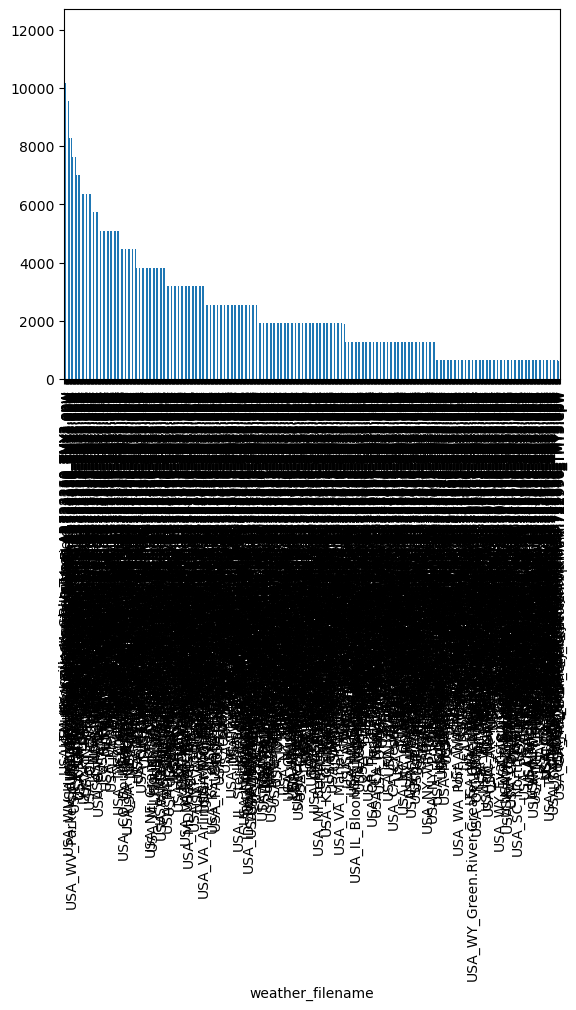

In [47]:
bstk2.groupby('weather_filename').size().sort_values(ascending=False).plot.bar()

In [48]:
bstk2.groupby('weather_filename').size().sort_values(ascending=True)

weather_filename
USA_CA_Hawthorne-Jack.Northrop.Field.722956_TMY3.epw      621
USA_AZ_Phoenix-Sky.Harbor.Intl.AP.722780_TMY3.epw         630
USA_CA_Fullerton.Muni.AP.722976_TMY3.epw                  630
USA_CA_San.Jose.Intl.AP.724945_TMY3.epw                   635
USA_CA_Bakersfield-Meadows.Field.723840_TMY3.epw          635
                                                        ...  
USA_KY_Jackson-Julian.Carroll.AP.724236_TMY3.epw         9554
USA_GA_Augusta-Bush-Field.722180_TMY3.epw               10186
USA_TN_Crossville.Mem.AP.723265_TMY3.epw                10187
USA_TN_Knoxville-McGhee.Tyson.AP.723260_TMY3.epw        12093
USA_KY_Lexington-Bluegrass.AP.724220_TMY3.epw           12097
Length: 852, dtype: int64

In [49]:
set(zipcode_wx['weather_filename']).difference(bstk2['weather_filename'])

{'USA_AK_Adak.NAS.704540_TMY3.epw',
 'USA_AK_Ambler.701718_TMY3.epw',
 'USA_AK_Anaktuvuk.Pass.701625_TMY3.epw',
 'USA_AK_Anchorage-Elmendorf.AFB.702720_TMY3.epw',
 'USA_AK_Anchorage-Lake.Hood.Seaplane.Base.702725_TMY3.epw',
 'USA_AK_Anchorage.Intl.AP.702730_TMY3.epw',
 'USA_AK_Aniak.AP.702320_TMY3.epw',
 'USA_AK_Anvik.702075_TMY3.epw',
 'USA_AK_Bettles.Field.701740_TMY3.epw',
 'USA_AK_Birchwood.702746_TMY3.epw',
 'USA_AK_Cold.Bay.AP.703160_TMY3.epw',
 'USA_AK_Cordova.702960_TMY3.epw',
 'USA_AK_Deadhorse.700637_TMY3.epw',
 'USA_AK_Dillingham.AWOS.703210_TMY3.epw',
 'USA_AK_Eielson.AFB.702650_TMY3.epw',
 'USA_AK_Emmonak.702084_TMY3.epw',
 'USA_AK_Gambell.702040_TMY3.epw',
 'USA_AK_Gulkana.702710_TMY3.epw',
 'USA_AK_Gustavus.703670_TMY3.epw',
 'USA_AK_Hayes.River.702495_TMY3.epw',
 'USA_AK_Homer.AP.703410_TMY3.epw',
 'USA_AK_Huslia.702225_TMY3.epw',
 'USA_AK_Hydaburg.Seaplane.Base.703884_TMY3.epw',
 'USA_AK_Kake.Seaplane.Base.703855_TMY3.epw',
 'USA_AK_McGrath.AP.702310_TMY3.epw',
 'USA_A

In [50]:
bstk2.groupby('weather_filename').size().describe()

count      852.000000
mean      2347.417840
std       1861.601941
min        621.000000
25%        640.000000
50%       1909.000000
75%       3183.000000
max      12097.000000
dtype: float64